In [1]:
import openturns as ot
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

%load_ext autoreload
%autoreload 2

random_state = 123
np.random.seed(random_state)

In [13]:
from depimpact.tests.test_functions import func_sum

def test_func(x):
    return np.sin(x).sum(axis=1)
dim = 2

In [14]:
margins = [ot.Uniform()]*dim
dim = len(margins)

In [15]:
from depimpact import ConservativeEstimate, quantile_func

alpha = 0.05

if alpha > 0.5: # Maximizing the quantile
    def q_func(x, axis=1):
        return - quantile_func(alpha)(x, axis=axis)
else: # Minimizing
    q_func = quantile_func(alpha)

In [16]:
from depimpact.utils import get_grid_sample, to_copula_params
from depimpact.dependence_plot import plot_variation, compute_influence
K = 12
n = int(1E4)
pair = [1, 0]

copulas = {'Normal': [1, 1],
           'Clayton': [3, 23],
           'Gumbel': [14, 24],
           'Joe': [16, 26]}

families = np.zeros((dim, dim))
quant_estimate = ConservativeEstimate(model_func=test_func, margins=margins, families=families)
kendalls, output_samples = compute_influence(quant_estimate, K, n, copulas, pair=pair)

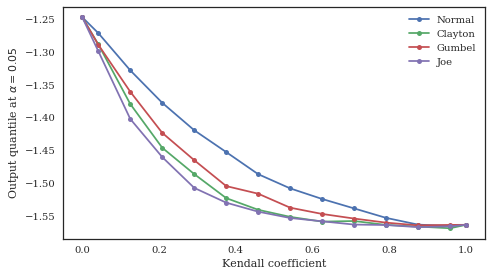

In [17]:
ylabel = 'Output quantile at $\\alpha=%.2f$' % (alpha)
plot_area = 'right'

plt_lib = 'matplotlib'
plot_variation(output_samples, kendalls, q_func, plot_area, ylabel=ylabel, plt_lib=plt_lib)
plt.savefig('./output/%s_variation_quantile_%s_K%d_n_%d_%s.pdf' % (test_func.__name__, plt_lib, 
                                                                              K, n, plot_area))

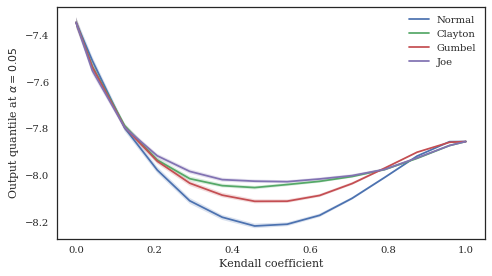

In [7]:
plt_lib = 'seaborn'
plot_variation(output_samples, kendalls, q_func, plot_area, ylabel=ylabel, plt_lib=plt_lib)
plt.savefig('./output/%s_variation_quantile_%s_K%d_n_%d_%s.pdf' % (test_func.__name__, plt_lib, 
                                                                              K, n, plot_area))

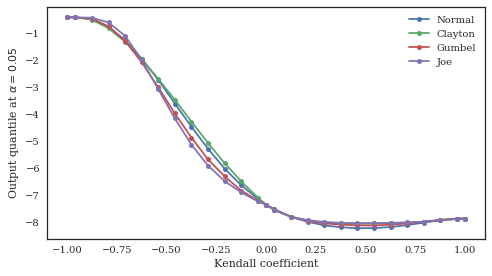

In [8]:
plot_area = 'full'

plt_lib = 'matplotlib'
plot_variation(output_samples, kendalls, q_func, plot_area, ylabel=ylabel, plt_lib=plt_lib)
plt.savefig('./output/%s_variation_quantile_%s_K%d_n_%d_%s.pdf' % (test_func.__name__, plt_lib, 
                                                                              K, n, plot_area))

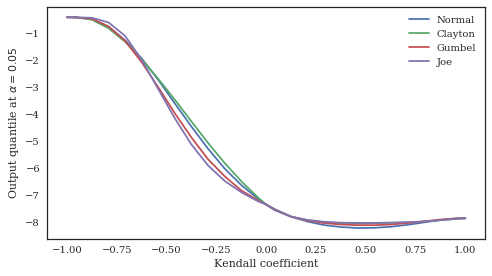

In [9]:
plt_lib = 'seaborn'
plot_variation(output_samples, kendalls, q_func, plot_area, ylabel=ylabel, plt_lib=plt_lib)
plt.savefig('./output/%s_variation_quantile_%s_K%d_n_%d_%s.pdf' % (test_func.__name__, plt_lib, 
                                                                              K, n, plot_area))